In [54]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
import datetime
from datetime import timedelta
sns.set_style("whitegrid")

df=pd.read_excel("ml_project1_data.xlsx", index_col=0)
display(df.head(3))
print(df.info(), "\nResponse rate: {}%".format(round(100*df["Response"].mean(), 2)))

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 non-null int64
AcceptedCmp4           22

In [2]:
columns = ["Kidhome","Teenhome","AcceptedCmp3"]

df[columns] = df[columns].astype("object")

In [2]:
## Delete Constant Columns
df.drop(["Z_CostContact", "Z_Revenue"], axis=1,inplace=True)

## Change Dt_Customer to amount of Days till today
datetimeFormat = '%Y-%m-%d'
today = "2019-04-12"
days_customer = []

for i in df["Dt_Customer"]:
    
    diff = datetime.datetime.strptime(today, datetimeFormat) - datetime.datetime.strptime(i, datetimeFormat)
    days_customer.append(diff.days)

df["DaysCustomer"] = days_customer
df.drop(["Dt_Customer"], axis=1, inplace=True)

## Convert the columns that are categorical, but still are classified as numerical to an object.
df["Kidhome"] = df["Kidhome"].astype("object")
df["Teenhome"] = df["Teenhome"].astype("object")
df["AcceptedCmp3"] = df["AcceptedCmp3"].astype("object") 
df["AcceptedCmp1"] = df["AcceptedCmp1"].astype("object") 
df["AcceptedCmp2"] = df["AcceptedCmp2"].astype("object") 
df["AcceptedCmp4"] = df["AcceptedCmp4"].astype("object") 
df["AcceptedCmp5"] = df["AcceptedCmp5"].astype("object") 
df["Complain"] = df["Complain"].astype("object") 

In [7]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                 object
Teenhome                object
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3            object
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [31]:
##drop categories that are weird

errors_dict = {"Marital_Status": "YOLO", "Marital_Status": "Alone", "Marital_Status": "Absurd"}
for key, value in errors_dict.items():
    df = df[df[key] != value]

In [58]:
errors_dict = {"Marital_Status": "YOLO"}
df = drop_weird_cat(df, errors_dict)

In [59]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd'], dtype=object)

In [69]:
## Deal with Nan Values

df = df.dropna(subset = ["Income"])

In [22]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,DaysCustomer
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,2411
2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,1861
4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,2060
6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,1887
5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,1909


In [23]:
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
DaysCustomer           0
dtype: int64

### Outliers

In [70]:
df_num = df.select_dtypes(include=["number"]).drop(["Response"], axis = 1)

In [9]:
df_num.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,DaysCustomer
ID,,,,,,,,,,,,,,,
5524,1957,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,2411
2174,1954,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,1861
4141,1965,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,2060
6182,1984,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,1887
5324,1981,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,1909


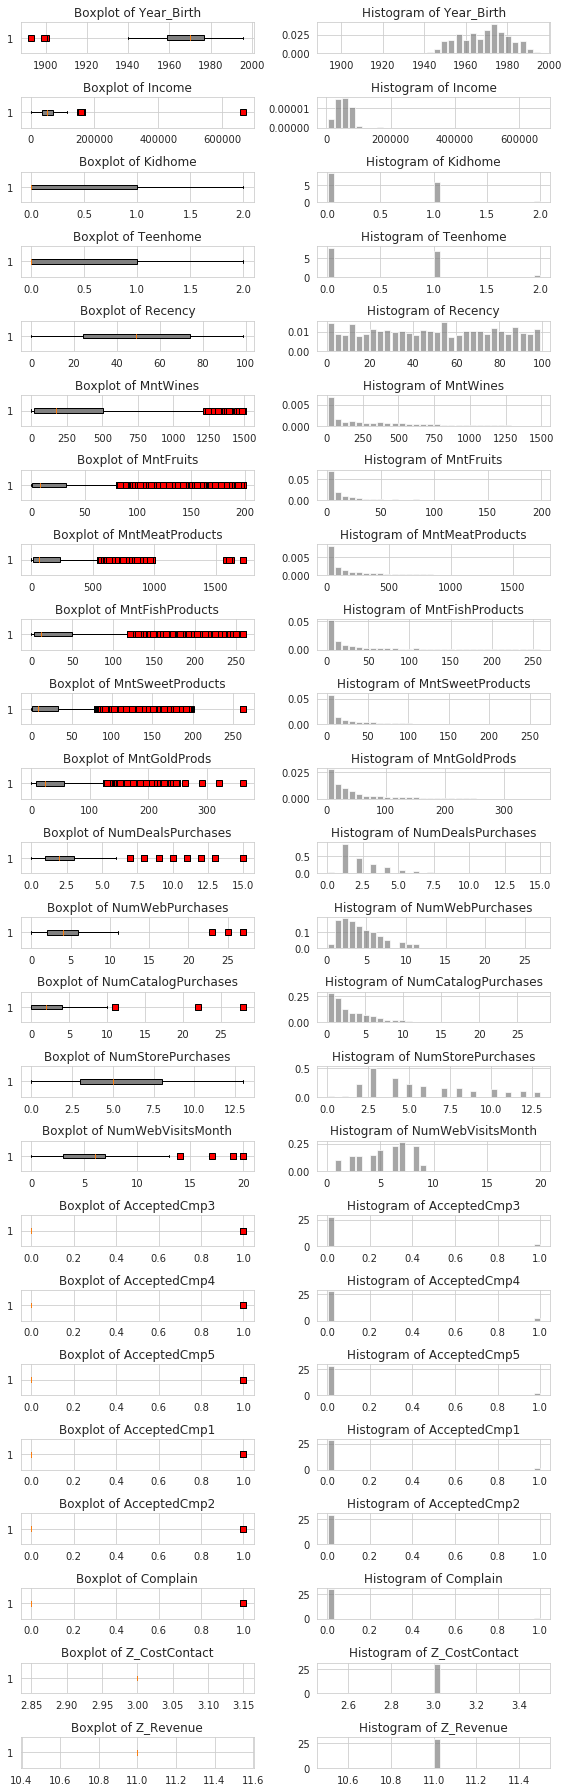

In [62]:
def univariate_outlier_id_plot(df):
    df_num = df.select_dtypes(include=["number"]).drop(["Response"], axis = 1)
    color = "gray"
    fig = plt.figure(figsize=(8, 25))
    i=1
    for feature in df_num:        
        if feature == "Income":
          ser = df_num[feature].copy()
          ser.dropna(inplace=True)
        else:
          ser = df_num[feature]
        ax = fig.add_subplot(df_num.shape[1], 2, i)
        box = ax.boxplot(ser, flierprops=dict(markerfacecolor='r', marker='s'), vert=False, patch_artist=True)
        box['boxes'][0].set_facecolor(color)
        ax.set_title("Boxplot of "+feature)
        ax = fig.add_subplot(df_num.shape[1], 2, i+1)
        ax.hist(ser, density=1, bins=30, color=color, alpha=0.7, rwidth=0.85)
        ax.set_title("Histogram of "+feature)
        i+=2

    plt.tight_layout()
    plt.show()
    
univariate_outlier_id_plot(df)

In [63]:
def filter_by_std(series_, n_stdev=3.0, return_thresholds=False):
    mean_, stdev_ = series_.mean(), series_.std()
    cutoff = stdev_ * n_stdev
    lower_bound, upper_bound = mean_ - cutoff, mean_ + cutoff
    if return_thresholds:
        return lower_bound, upper_bound
    else:
        return [True if i < lower_bound or i > upper_bound else False for i in series_]
    
def filter_by_iqr(series_, k=1.5, return_thresholds=False):
    q25, q75 = np.percentile(series_, 25), np.percentile(series_, 75)
    iqr = q75-q25
    
    cutoff = iqr*k
    lower_bound, upper_bound = q25-cutoff, q75+cutoff
    
    if return_thresholds:
        return lower_bound, upper_bound
    else:
        return [True if i < lower_bound or i > upper_bound else False for i in series_]

In [64]:
def plot_filter_by_stdev(df, feature, stdev_tuple=(3.0, 2.0), colors=("red", "yellow")):
    sns.distplot(df[feature], kde=False, color="gray")
    lower_bound_1, upper_bound_1 = filter_by_std(df[feature], n_stdev=stdev_tuple[0], return_thresholds=True)
    lower_bound_2, upper_bound_2 = filter_by_std(df[feature], n_stdev=stdev_tuple[1], return_thresholds=True)
    if df[feature].min()<=0:
        plt.axvspan(min(df[feature][df[feature] < lower_bound_1], default=df[feature].min()), lower_bound_1, alpha=0.2, color=colors[0])
        plt.axvspan(min(df[feature][df[feature] < lower_bound_2], default=df[feature].min()), lower_bound_1, alpha=0.2, color=colors[1])
    plt.axvspan(upper_bound_1, max(df[feature][df[feature] > upper_bound_1], default=df[feature].max()), alpha=0.2, color=colors[0])
    plt.axvspan(upper_bound_2, max(df[feature][df[feature] > upper_bound_2], default=df[feature].max()), alpha=0.2, color=colors[1])
    plt.title("Outliers in {} by {} and {} standard deviations:\n".format(feature, stdev_tuple[0], stdev_tuple[1]))
    
def plot_filter_by_iqr(df, feature, k_tuple=(1.7, 1.2), colors=("red", "yellow")):
    sns.distplot(df[feature], kde=False, color="gray")
    lower_bound_1, upper_bound_1 = filter_by_iqr(df[feature], k=k_tuple[0], return_thresholds=True)
    lower_bound_2, upper_bound_2 = filter_by_iqr(df[feature], k=k_tuple[1], return_thresholds=True)
    if df[feature].min()<=0:
        plt.axvspan(min(df[feature][df[feature] < lower_bound_1], default=df[feature].min()), lower_bound_1, alpha=0.2, color=colors[0])
        plt.axvspan(min(df[feature][df[feature] < lower_bound_2], default=df[feature].min()), lower_bound_1, alpha=0.2, color=colors[1])
    plt.axvspan(upper_bound_1, max(df[feature][df[feature] > upper_bound_1], default=df[feature].max()), alpha=0.2, color=colors[0])
    plt.axvspan(upper_bound_2, max(df[feature][df[feature] > upper_bound_2], default=df[feature].max()), alpha=0.2, color=colors[1])
    plt.title("Outliers in {} by {} and {} k in IQR:\n".format(feature, k_tuple[0], k_tuple[1]))

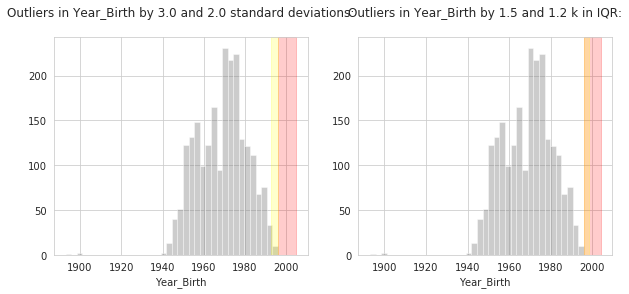

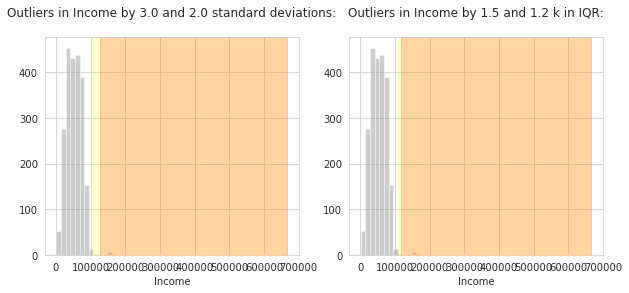

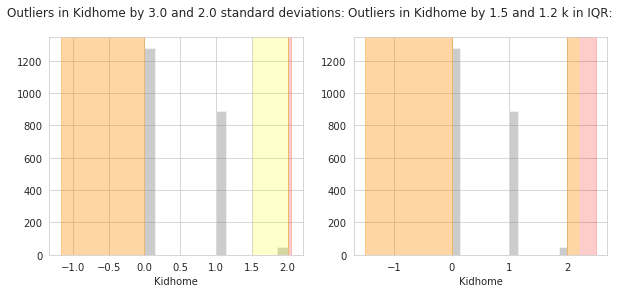

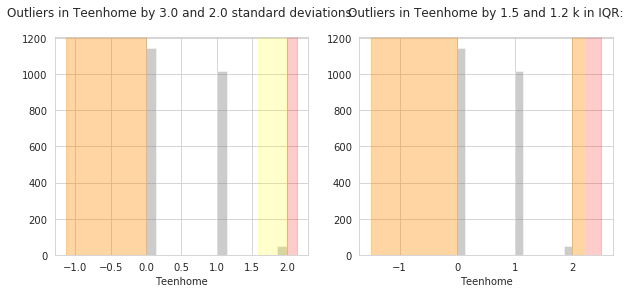

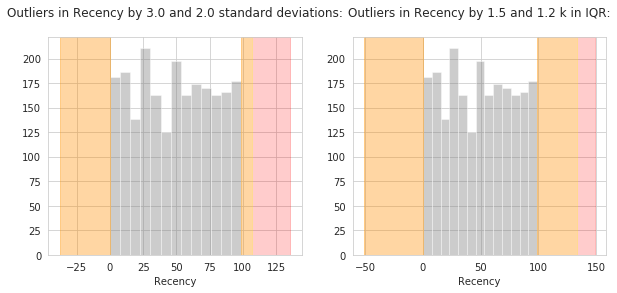

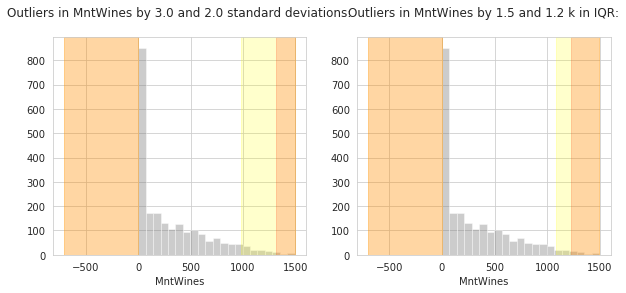

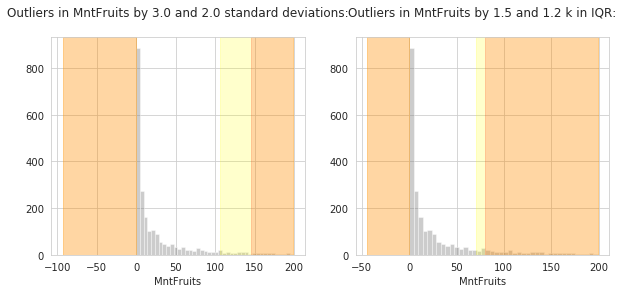

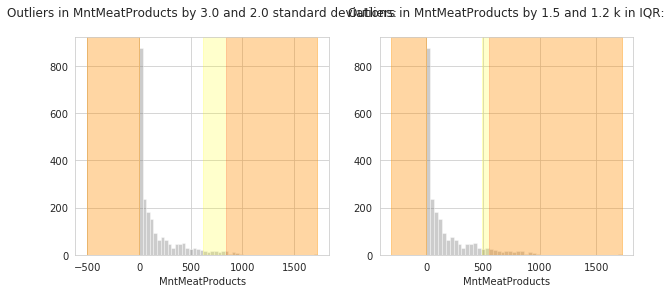

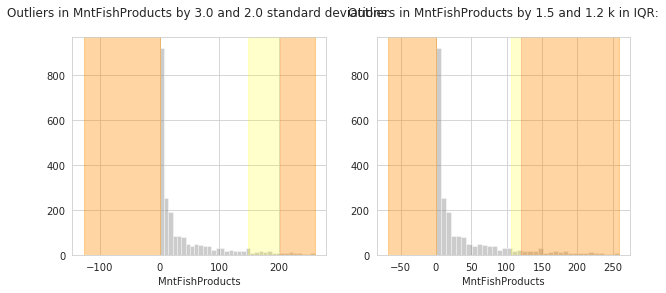

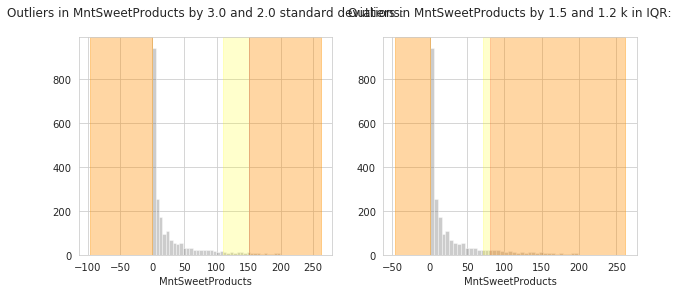

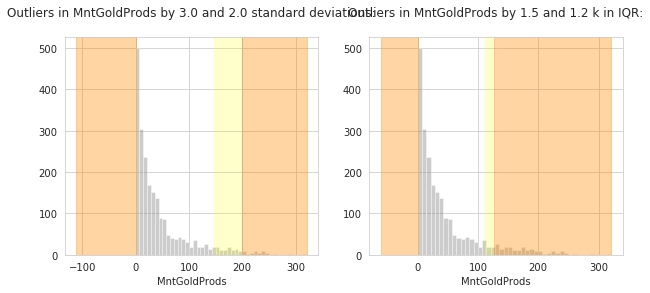

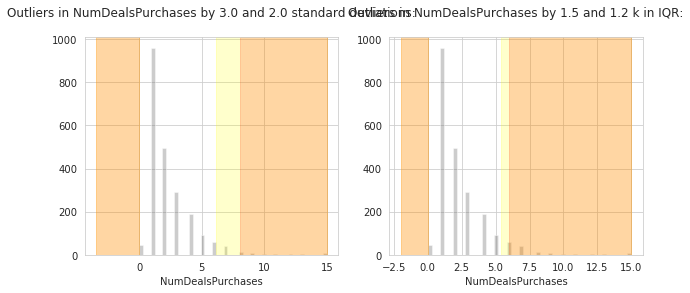

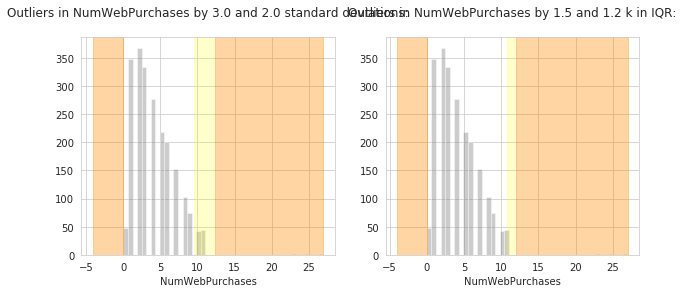

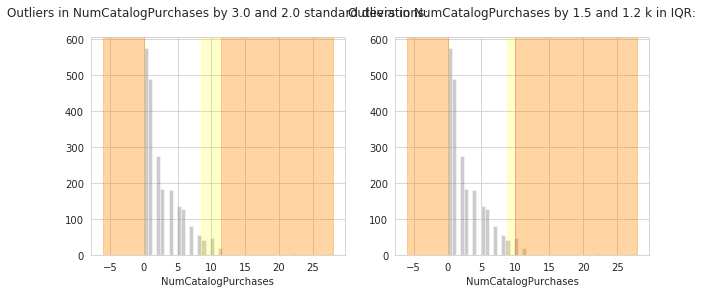

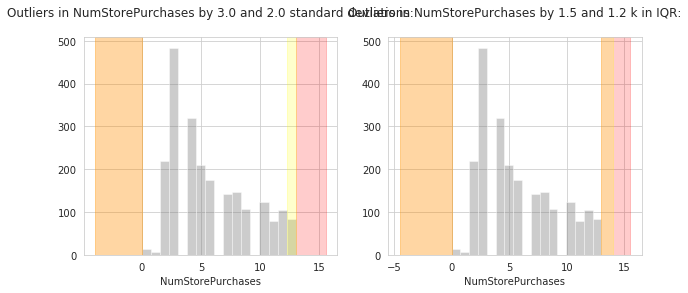

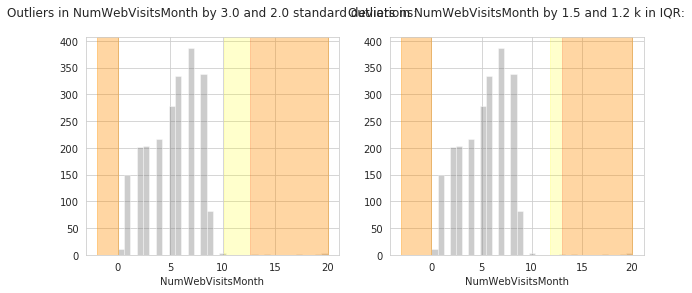

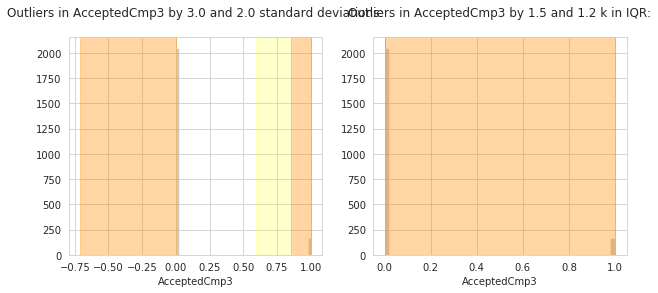

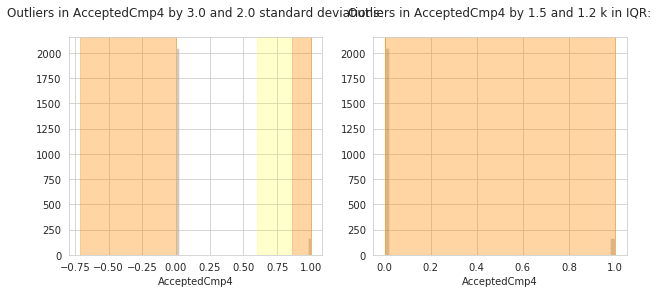

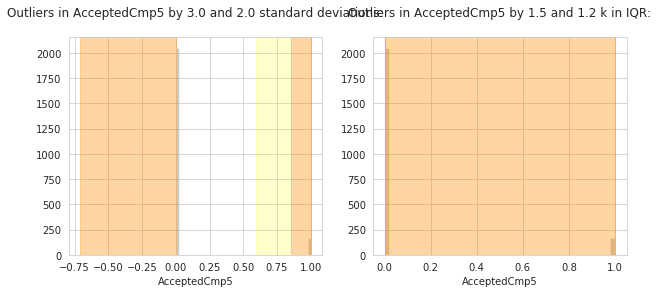

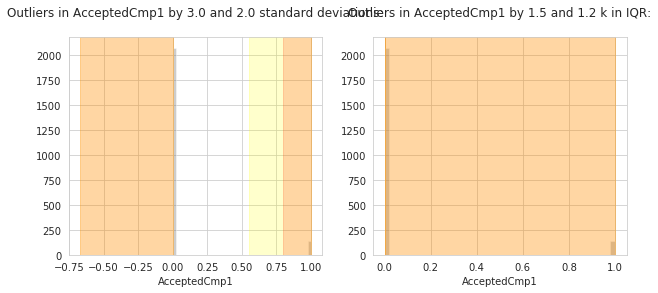

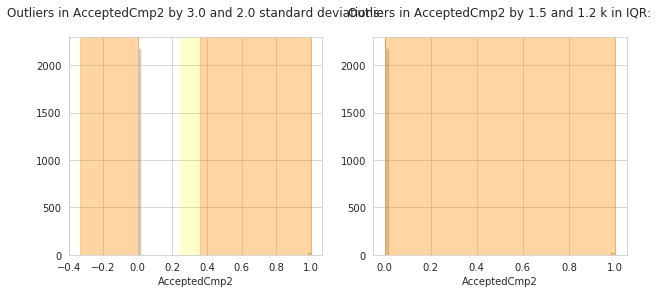

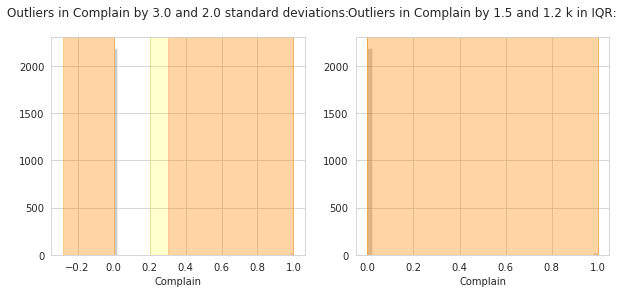

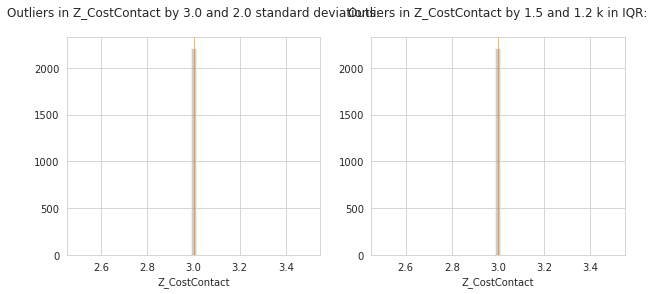

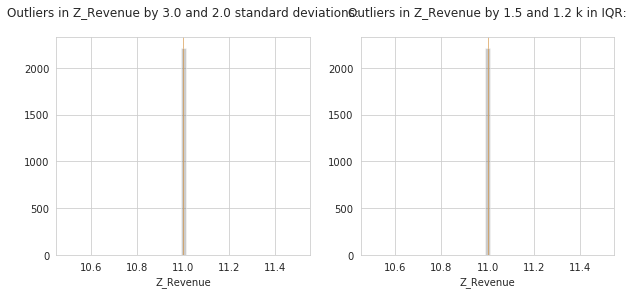

In [76]:
for i in df_num:

    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plot_filter_by_stdev(df, i, stdev_tuple=(3.0, 2.0), colors=("red", 'yellow'))

    plt.subplot(122)
    plot_filter_by_iqr(df, i, k_tuple=(1.5, 1.2), colors=("red", 'yellow'))

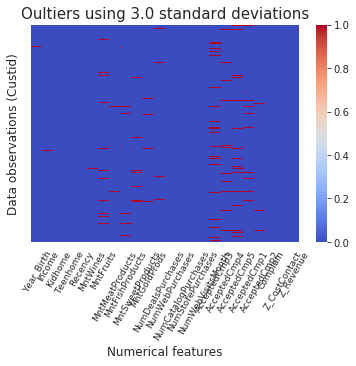

In [77]:
n_stdev = 3.0
out_mask = df_num.apply(axis=0, func=filter_by_std, n_stdev=n_stdev)

fig, ax = plt.subplots()
sns.heatmap(data=out_mask, ax=ax, cmap='coolwarm')
ax.set_title("Oultiers using {} standard deviations".format(n_stdev), size=15)
ax.yaxis.set_ticklabels([])
ax.set_ylabel("Data observations (Custid)", size=12)
ax.set_xticklabels(out_mask.columns, rotation=60, size=9)  
ax.set_xlabel("Numerical features", size=12)
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:161: UserWarning: Feature 0 is constant and will be replaced with 0.
  "replaced with 0." % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:161: UserWarning: Feature 0 is constant and will be replaced with 0.
  "replaced with 0." % jj)


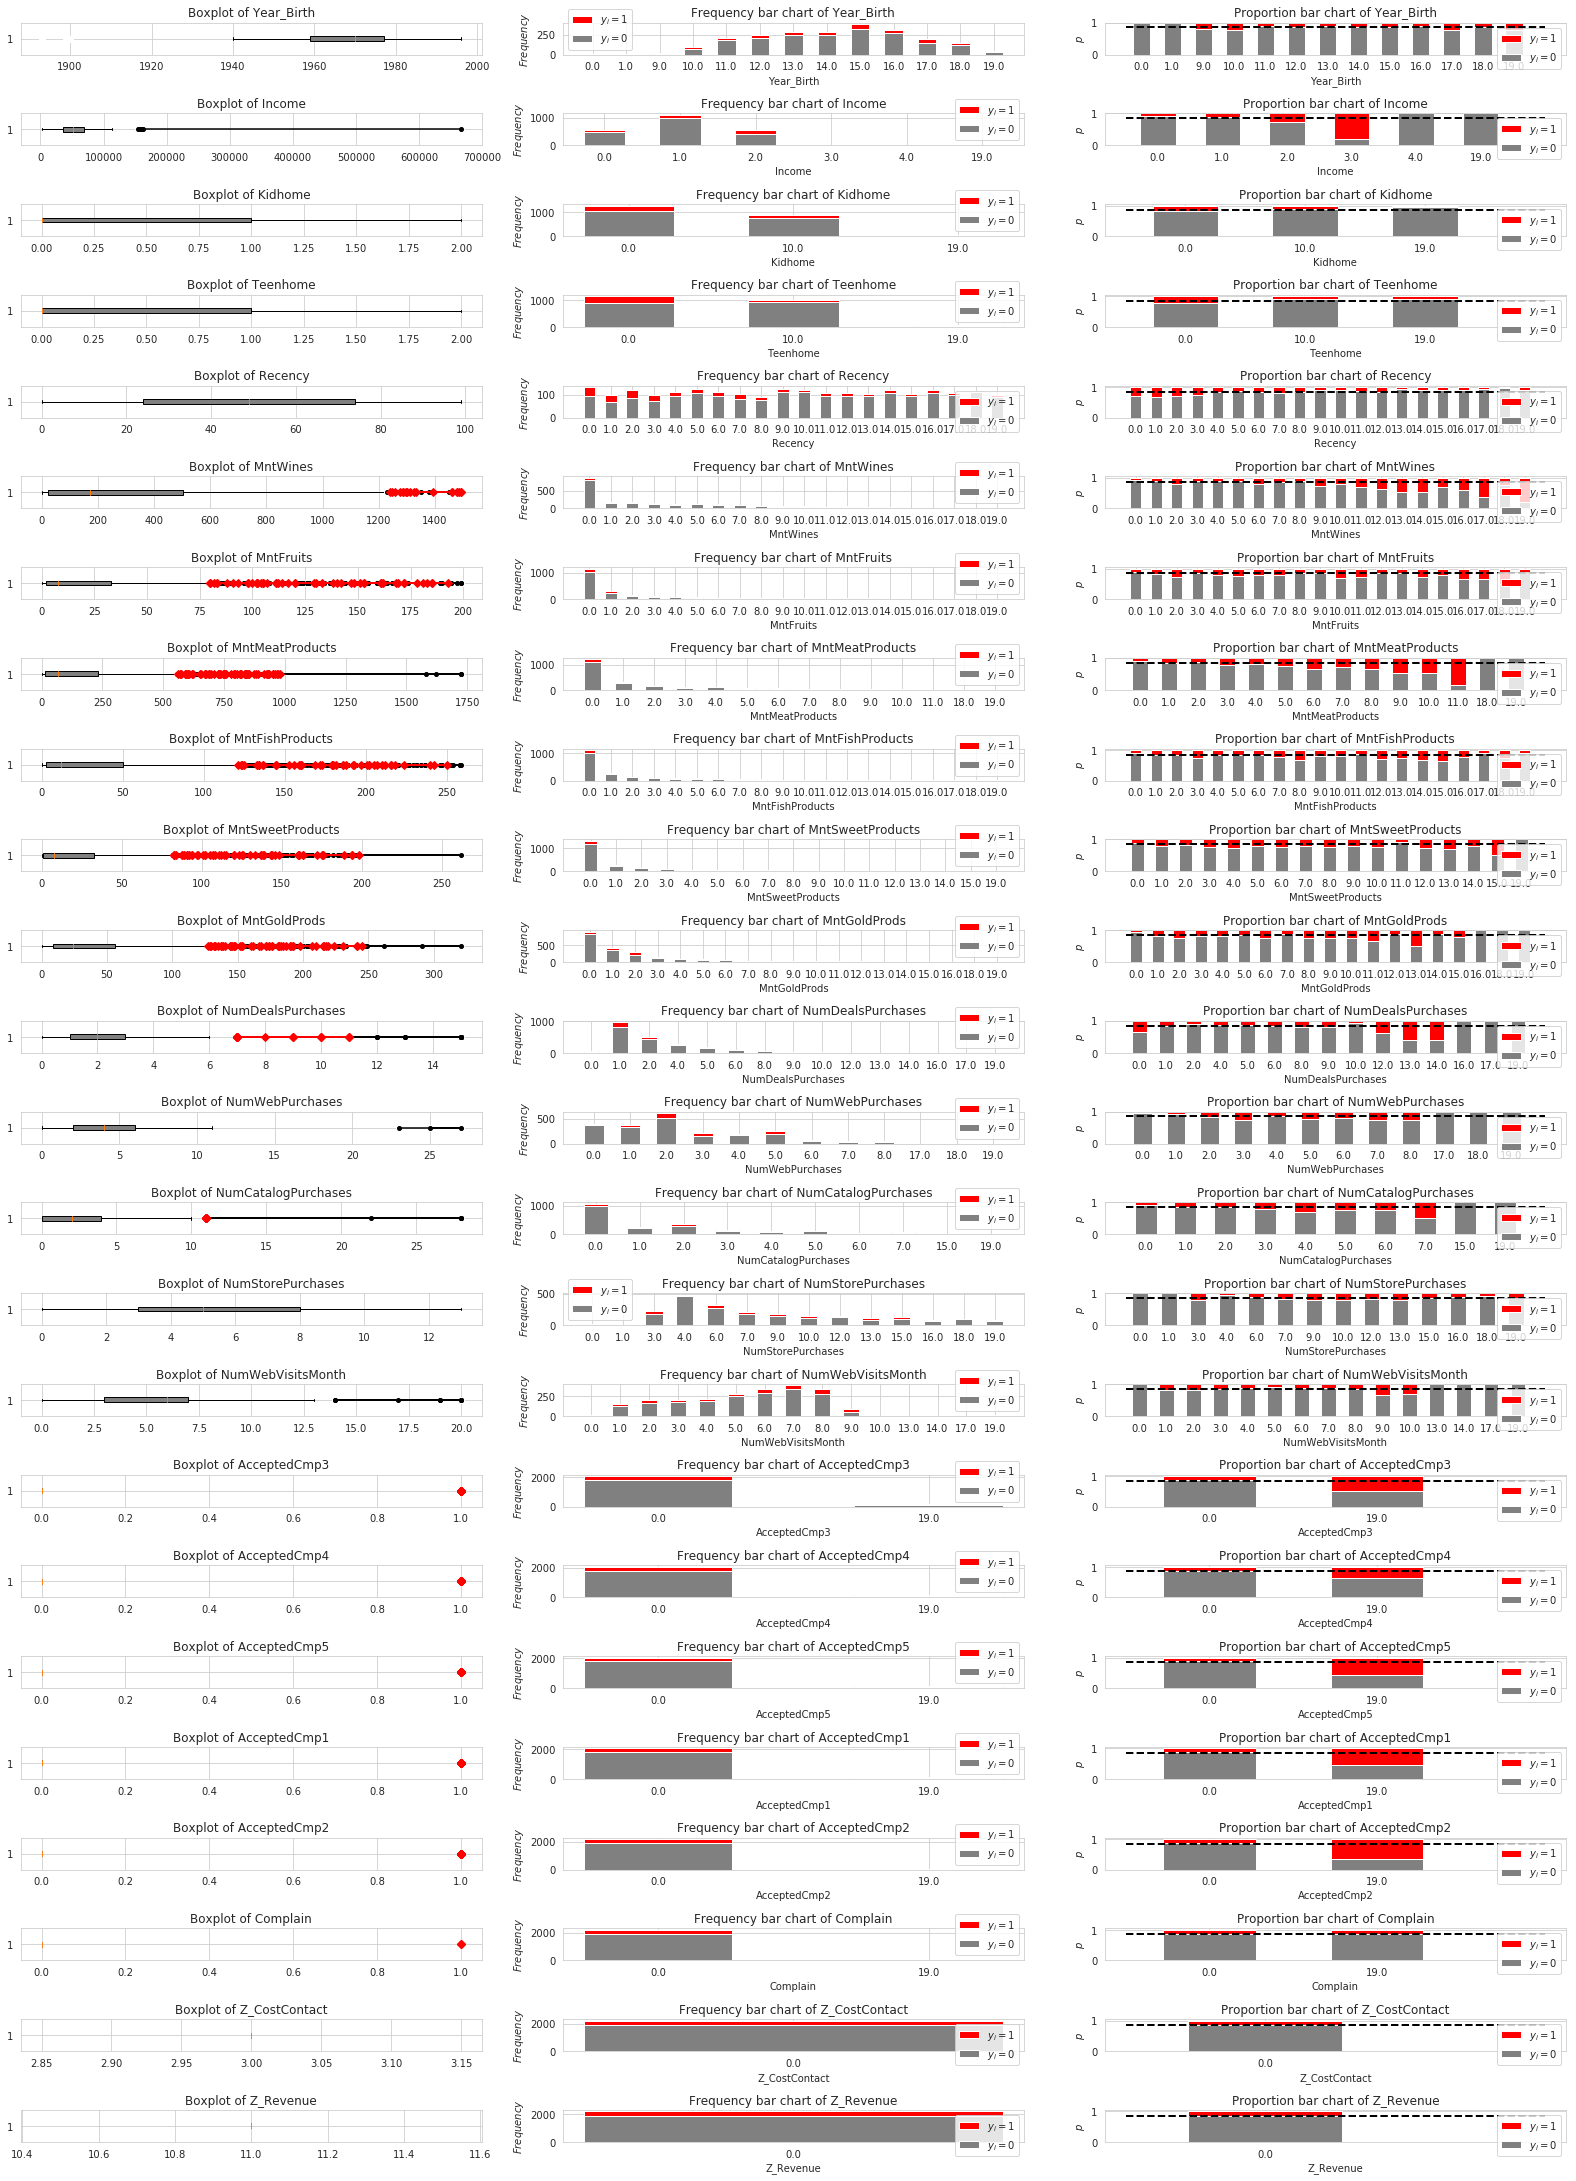

In [78]:
from sklearn.preprocessing import KBinsDiscretizer

def bivariate_outlier_id_plot(df, list_num_features, target, n_bins=20):
    fig = plt.figure(figsize=(22, 35))
    color = "gray"
    i=1
    for feature in list_num_features:
        if feature == "Income":
          ser = df[feature].copy()
          ser.dropna(inplace=True)
        else:
          ser = df[feature]
          
        # box plots
        thresholds = filter_by_iqr(ser, 1.5, True)
        outliers = df[[feature, target]][df[feature]>thresholds[1]]

        ax = fig.add_subplot(df.shape[1], 3, i)

        box = ax.boxplot(ser, flierprops=dict(markerfacecolor='r', marker='s'), 
                         vert=False, patch_artist=True, sym="w")                                                                  
        ax.plot(outliers.iloc[:, 0][outliers.iloc[:, 1]==0], np.ones(sum(outliers.iloc[:, 1]==0)), color="black", marker = "o", markersize=4)
        ax.plot(outliers.iloc[:, 0][outliers.iloc[:, 1]==1], np.ones(sum(outliers.iloc[:, 1]==1)), color="red", marker = "D", markersize=6)
        ax.set_title("Boxplot of "+feature)
        box['boxes'][0].set_facecolor(color)

        # freq bar
        ax = fig.add_subplot(df.shape[1], 3, i+1)

        bindisc = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', 
                                   strategy="uniform")
        feature_bin = bindisc.fit_transform(ser.values[:, np.newaxis])
        feature_bin = pd.Series(feature_bin[:, 0], index=ser.index)
        cont_tab = pd.crosstab(feature_bin, df.loc[ser.index, target], margins = True)
        categories = cont_tab.index[:-1].astype(str) 

        p1 = ax.bar(categories, cont_tab.iloc[:-1, 0].values, 
                     0.55, color="gray")
        p2 = ax.bar(categories, cont_tab.iloc[:-1, 1].values, 
                     0.55, bottom=cont_tab.iloc[:-1, 0], color="red")
        ax.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
        ax.set_title("Frequency bar chart of "+feature)
        ax.set_xlabel(feature)
        ax.set_ylabel("$Frequency$")

        # prop bar
        ax = fig.add_subplot(df.shape[1], 3, i+2)
        obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                            np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
        mean_target = 1-df[target].mean()

        p1 = ax.bar(categories, obs_pct[0], 0.55, color=color)
        p2 = ax.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="red")
        ax.plot([-.5, len(categories)], [mean_target, mean_target],'--', lw=2, color="black")
        ax.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
        ax.set_title("Proportion bar chart of "+feature)
        ax.set_xlabel(feature)
        ax.set_ylabel("$p$")

        i+=3

    plt.tight_layout()
    plt.show()

bivariate_outlier_id_plot(df, df_num.columns, "Response", n_bins=20)

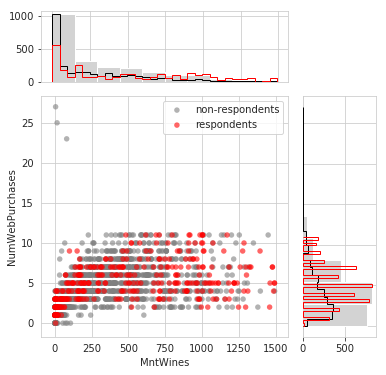

In [82]:
from matplotlib.gridspec import GridSpec

def personalized_scatter(df, x_f, y_f, target, n_bins=20): 
    colors = ("gray", "red")
    groups = ("non-respondents", "respondents")

    # subset
    X_0 = df.loc[df[target]==0, [x_f, y_f]].values
    X_1 = df.loc[df[target]==1, [x_f, y_f]].values    
    data = ((X_0[:, 0], X_0[:, 1]), (X_1[:, 0], X_1[:, 1])) 

    fig = plt.figure(figsize=(6,6))
    gs = GridSpec(4,4)
    ax_joint = fig.add_subplot(gs[1:4,0:3])
    ax_marg_x = fig.add_subplot(gs[0,0:3])
    ax_marg_y = fig.add_subplot(gs[1:4,3])

    for data, color, group in zip(data, colors, groups):
        x, y = data
        ax_joint.scatter(x, y, alpha=.6, c=color, edgecolors='none', s=30, label=group)
         
    ax_marg_x.hist(df[x_f].values, color="lightgray")
    ax_marg_y.hist(df[y_f].values, orientation="horizontal", color="lightgray")

    ax_xdens = ax_marg_x.twinx()
    ax_xdens.hist(X_0[:, 0], bins=n_bins, histtype='step', color='black', density=True, align='mid')
    ax_xdens.hist(X_1[:, 0], bins=n_bins, histtype='step', color='r', density=True, align='mid')
    ax_xdens.axis('off')

    ax_ydens = ax_marg_y.twiny()
    ax_ydens.hist(X_0[:, 1], bins=n_bins, histtype='step', color='black', density=True, align='mid',orientation='horizontal')
    ax_ydens.hist(X_1[:, 1], bins=n_bins, histtype='step', color='r', density=True, align='mid',orientation='horizontal')
    ax_ydens.axis('off')

    # turn off tick labels on marginals
    plt.setp(ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(ax_marg_y.get_yticklabels(), visible=False)

    # set labels on joint
    ax_joint.set_xlabel(x_f)
    ax_joint.set_ylabel(y_f)

    # set labels on marginals
    ax_joint.legend()
    plt.show()
    
personalized_scatter(df, "MntWines", "NumWebPurchases", "Response", 30) 